<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/NetWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

##Data acquisition

In [78]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [79]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

###Visualization of image data

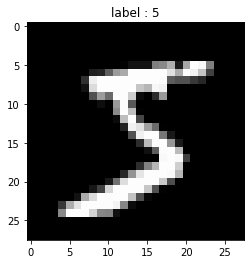

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


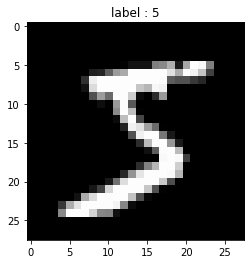

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

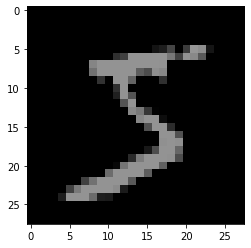

In [81]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # Convert to float type
image -= 105.35 # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

###Processing

In [82]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


## Probleme 1 Creating a code to determine the initial weight value

In [83]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # Standard deviation of Gaussian distribution
W1 = sigma * np.random.randn(n_features, n_nodes1)
print(W1)

[[ 0.00902681  0.0014668  -0.01047415 ...  0.00342602 -0.00130192
   0.00417317]
 [ 0.00980195 -0.00754416  0.01135518 ... -0.01405286  0.00309936
   0.00275341]
 [ 0.02012611 -0.00261933 -0.00164667 ... -0.00717145  0.01605538
  -0.00980632]
 ...
 [ 0.02019823 -0.00535407 -0.00594362 ... -0.00639892 -0.00496744
   0.01025262]
 [-0.00130557  0.02715041 -0.00292842 ... -0.0164123   0.00377273
   0.00545898]
 [-0.00398785  0.0071053   0.00394439 ...  0.00363016 -0.00613324
   0.00411596]]


##[Problem 2] Implementation of forward propagation

In [84]:
n_features = 784
n_output=10
sigma = 0.01

n_nodes1 = 400
W1 = sigma * np.random.randn(n_features, n_nodes1)

n_nodes2 = 200
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)

W3=sigma*np.random.randn(n_nodes2,n_output)

In [85]:
def forward_propagation(X):
  B1=0
  B2=0
  B3=0
  new_inputs=[]
  A1=X.dot(W1)+B1
  z1 = sigmoid(A1)

  A2=z1.dot(W2)+B2
  z2=sigmoid(A2)

  A3=z2.dot(W3)+B3
  z3=softmax(A3)

   
  return z3,z2,z1,A1,A2,A3

In [86]:
def sigmoid(A):
  return 1/(1+np.exp(-A))

In [87]:
def tanh(A):
  return (np.exp(A)-np.exp(-A)/(np.exp(A)+np.exp(-A)))

In [88]:
def softmax(A3_k):
  return np.exp(A3_k)/np.sum(np.exp(A3_k))


In [89]:
z3,z2,z1,A1,A2,A3=forward_propagation(X_train)
z3

array([[1.65070439e-06, 1.80286552e-06, 1.63838273e-06, ...,
        1.57176260e-06, 1.69979815e-06, 1.65200092e-06],
       [1.65041088e-06, 1.80250942e-06, 1.63820340e-06, ...,
        1.57187301e-06, 1.69991519e-06, 1.65198741e-06],
       [1.65044883e-06, 1.80253351e-06, 1.63861095e-06, ...,
        1.57205925e-06, 1.69997074e-06, 1.65210254e-06],
       ...,
       [1.65069851e-06, 1.80262029e-06, 1.63839551e-06, ...,
        1.57182100e-06, 1.69944170e-06, 1.65187815e-06],
       [1.65080937e-06, 1.80272360e-06, 1.63821909e-06, ...,
        1.57156108e-06, 1.69974591e-06, 1.65213514e-06],
       [1.65049536e-06, 1.80295072e-06, 1.63850692e-06, ...,
        1.57211178e-06, 1.69948039e-06, 1.65201454e-06]])

In [90]:
z3.shape

(60000, 10)

#[Problem 3] Implementation of cross entropy error

In [91]:
def cross_entropy_error(nb,y,z3):
  sum1=np.sum(y.dot((np.log(z3)+1e-7)))
  return (-1/nb)*(np.sum(sum1))

In [92]:
cross_entropy_error(len(X_train),y_train,z3)

592.6166307108165

#[Problem 4] Implementation of backpropagation

In [125]:
def backpropagation(X,nb,z3,y):
  ######################

  dLA3=(1/nb)*(z3-y[:,None])
  dLB3=np.sum(dLA3)
  dLW3=z2.T.dot(dLA3)
  dLz2=dLA3.dot(W3.T)

  ######################

  dLA2=np.multiply(dLz2,(1-tanh(A2)**2))
  dLB2=np.sum(dLA2)
  dLW2=z1.T.dot(dLA2)
  dLz1=dLA2.dot(W2.T)

  ######################

  dLA1=np.multiply(dLz1,(1-tanh(A1)**2))
  dLB2=np.sum(dLA1)
  dLW1=X.T.dot(dLA1)

  return dLW1




In [126]:
backpropagation(X_train,len(X_train),z3,y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#[Problème 5] Estimation

In [131]:
np.argmax(z3,axis=0)

array([56737, 10397, 29120, 26017, 31603,  5461, 25075,  5620, 56236,
       32601])

#[Problème 6] Apprentissage et estimation

In [136]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255

In [137]:
z3,z2,z1,A1,A2,A3=forward_propagation(X_train)
z3

array([[1.65070439e-06, 1.80286552e-06, 1.63838273e-06, ...,
        1.57176260e-06, 1.69979815e-06, 1.65200092e-06],
       [1.65041088e-06, 1.80250942e-06, 1.63820340e-06, ...,
        1.57187301e-06, 1.69991519e-06, 1.65198741e-06],
       [1.65044883e-06, 1.80253351e-06, 1.63861095e-06, ...,
        1.57205925e-06, 1.69997074e-06, 1.65210254e-06],
       ...,
       [1.65069851e-06, 1.80262029e-06, 1.63839551e-06, ...,
        1.57182100e-06, 1.69944170e-06, 1.65187815e-06],
       [1.65080937e-06, 1.80272360e-06, 1.63821909e-06, ...,
        1.57156108e-06, 1.69974591e-06, 1.65213514e-06],
       [1.65049536e-06, 1.80295072e-06, 1.63850692e-06, ...,
        1.57211178e-06, 1.69948039e-06, 1.65201454e-06]])

In [138]:
cross_entropy_error(len(X_train),y_train,z3)

592.6166307108165

In [164]:
print(z3.shape)
print(y_train[:,None].T.shape)

(60000, 10)
(1, 60000)
